In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from abc import ABC, abstractmethod
import numpy as np


In [2]:
class Tree:
    
    def __init__(self, root):
        self.root = root
        self.labels = []
        root.setTree(self)
        self.generate(root)

    @abstractmethod
    def generate(self, node):
        pass
    
    def addLabel(self, label: int):
        self.labels.append(label)

class Node:
    TEAL = "#e6f2f2"
    GOLD = "#fcc200"
    PURPLE = "#f9e6ec"

    colors = [TEAL, GOLD, PURPLE]
    
    columns = []

    predecessor_con = []
    successor_con = []
    connection_id = 0

    movement_con = []

    def __init__(self, label):
        self.tree = None
        self.predecessor = None
        self.successors = [] 
        self.label = label
        self.col = 0
        self.row = 0

    def addSuccessor(self, successor):
        successor.row = self.row + 1
        if self.tree is not None and not successor.label in self.tree.labels:
            successor.setTree(self.tree)
            successor.predecessor = self
            self.successors.append(successor)
    
    def setTree(self, tree: Tree):
        self.tree = tree
        self.tree.addLabel(self.label)

    def getType(label):
        if (label + 1) % 3 == 0:
            return 1
        elif label % 3 == 0:
            return 2
        elif (label - 1) % 3 == 0:
            return 3
        return -1


    def setPosition(self):
        col_counter = 0
        len_col_i = 0
        len_columns = len(Node.columns)
        col = 0
        row = 0

        for i in range(0,len_columns):
            len_col_i = len(Node.columns[i])
            for j in range(0, len_col_i):
                
                if Node.columns[i][j] == int(self.label):
                    col = i+1

        if self.label == 1:
            row = 1
        elif self.label == 3:
            row = 2
        else:
            for i in range(1,int(self.label)):
                if self.label > (2**(i-1)) and self.label < (2**i - 1):
                    row = i+1
                    break

        self.col = col
        self.row = row

        return-1

    





class DataFrameGenerator:
    @staticmethod
    def generateGraphData(node : Node, horizontal_flip = False, predecessor_successor_array = []) -> list:
        successors = node.successors[::-1] if horizontal_flip else node.successors
        for successor in successors:
            predecessor_successor_array.append([node.label, successor.label])
            DataFrameGenerator.generateGraphData(successor, horizontal_flip, predecessor_successor_array)
        return predecessor_successor_array

    @staticmethod
    def generateDataFrame(node : Node, horizontal_flip = False) -> pd.DataFrame: 
        columns = ['predecessorId', 'successorId']
        df = pd.DataFrame(columns = columns, data=DataFrameGenerator.generateGraphData(node, horizontal_flip, []))
        df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
        df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
        return df




In [3]:
#Aberkane Tree
class AberkaneTree(Tree):
    def __init__(self, root: Node, height: int):
        self.height = height  
        super().__init__(root)   


    def generate(self, node: Node):


        mid_in_range = True
        left_in_range = True
        right_in_range = True

        label = node.label
        h = self.height
        b_leaf = 1
        for i in range(1,h+1):
            b_leaf = int(b_leaf * 2 + 1) 

        if (node.label * 4 + 1) > (b_leaf):
            mid_in_range = False
        else:
            mid_in_range = True

        if (node.label * 2 + 1) > (b_leaf):
            right_in_range = False
        else:
            right_in_range = True

        if (node.label * 2 - 1) > (b_leaf):
            left_in_range = False
        else:
            left_in_range = True
        




        if node.label == 1:
            
            right_child =  Node(node.label * 2 + 1)      
            node.addSuccessor(right_child)          
            self.generate(right_child)      
            Node.predecessor_con.append(int(1))
            Node.successor_con.append(int(3)) 
            Node.predecessor_con.append(int(1))
            Node.successor_con.append(int(5)) 
            Node.connection_id = Node.connection_id + 2

        else:
            
            if mid_in_range == True:
                middle_child = Node(node.label * 4 + 1)          
            if right_in_range == True:
                right_child = Node(node.label * 2 + 1)
            if left_in_range == True:
                left_child = Node(node.label * 2 - 1)

            if right_in_range == True:
                node.addSuccessor(right_child)
            if mid_in_range == True:
                node.addSuccessor(middle_child)
            if left_in_range == True:
                node.addSuccessor(left_child)

            if right_in_range == True:
                self.generate(right_child)
                Node.predecessor_con.append(node.label)
                Node.successor_con.append(right_child.label)
                Node.connection_id = Node.connection_id + 1
            if mid_in_range == True:
                self.generate(middle_child)
                Node.predecessor_con.append(node.label)
                Node.successor_con.append(middle_child.label)
                Node.connection_id = Node.connection_id + 1
            if left_in_range == True:
                self.generate(left_child)
                Node.predecessor_con.append(node.label)
                Node.successor_con.append(left_child.label)
                Node.connection_id = Node.connection_id + 1

        node.setPosition()
    
    def genColCluster(tree_height):
        
        aberkane_height = tree_height

        col_arr = []
        big_leaf = int(1)
        used_nodes = []
        col_position = 0
        is_right = False
        is_left = False
        right_node = 0
        left_node = 0

        for i in range(1,aberkane_height+1):
            big_leaf = int(big_leaf * 2 + 1) 

        for j in range(1,big_leaf+1, 2):
            is_part = False
            col_build = []

            for x in used_nodes:
                if j == x:
                    is_part = True
            
            if is_part == False:
                used_nodes.append(int(j))
                col_build.append(int(j))

                right_node = int((j-1)/2)
                left_node = int((j+1)/2)
                    
                is_right = False
                is_left = False

                for a in used_nodes:      
                    if j == 1:
                        is_right = True
                        is_left = True
                    elif a == int(right_node):
                        is_right = True
                    elif a == int(left_node):
                        is_left = True
                            
                test_node = j*4+1
                while(test_node < big_leaf):
                    test_node_is_part = False

                    for y in used_nodes:
                        if test_node == y:
                            test_node_is_part = True
                            test_node = big_leaf+1
                    
                    if test_node_is_part == False:

                        col_build.append(int(test_node))
                        used_nodes.append(int(test_node))
                        test_node = test_node * 4 + 1

                col_position
                len_col_i = 0
                len_columns = len(col_arr)

                for i in range(0,len_columns):
                    len_col_i = len(col_arr[i])
                    for j in range(0, len_col_i):
                    
                        if col_arr[i][j] == left_node or col_arr[i][j] == right_node:
                            col_position = i 

                if is_left == True and is_right == True:
                    col_arr.append(col_build)
                    #Node.movement_con.append()
                    Node.movement_con.append(left_node)
                elif is_left == True:
                    if col_position == 0:
                        col_arr.insert(col_position, col_build)
                    else:
                        col_arr.insert(col_position, col_build)
                    
                    Node.movement_con.append(col_build[0])

                elif is_right == True:
                    col_arr.insert(col_position+1, col_build)
                    

        Node.columns = col_arr
        return

#aberkane_height = 5

#AberkaneTree.genColCluster(aberkane_height-1)
#root = Node(1)

#aberkane_tree = AberkaneTree(root, aberkane_height-1)
#print(root.columns)
#print(root.col)




        
        

In [4]:

#def generateDF(): 
#   
#    df1 = {}
#
#    con_arr = []
#
#    for i in range (0, Node.connection_id):
#        con_arr.append([Node.predecessor_con[i], Node.successor_con[i]])
#
#    df1 = generateDataFrame1(con_arr)
#
#    return df1
#
#def generateDataFrame1(con_arr) -> pd.DataFrame: 
#    columns = ['predecessorId', 'successorId']
#    df = pd.DataFrame(columns = columns, data=con_arr)
#    df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
#    df[['predecessorId', 'successorId']] = df[['predecessorId', 'successorId']].astype('int')
#    return df
#
#
#
#aberkane_height = 6 # set number of rows here
#
#AberkaneTree.genColCluster(aberkane_height-1)
#root = Node(1)
#
#aberkane_tree = AberkaneTree(root, aberkane_height-1) 

# df = DataFrameGenerator.generateDataFrame(root)
# #df = generateDF()

# G = nx.from_pandas_edgelist(df, 'predecessorId', 'successorId', create_using=nx.DiGraph)


# #test:

# node_colors = []
# for node in G:
#     color_type = Node.getType(node)
#     node_colors.append(Node.colors[color_type-1])


# def generatePosArr(label_value):
    
#     col_counter = 0
#     len_col_i = 0
#     len_columns = len(Node.columns)
#     col = 0.0
#     row = 0.0

#     for i in range(0,len_columns):
#         len_col_i = len(Node.columns[i])

#         for j in range(0, len_col_i):
            
#             if Node.columns[i][j] == int(label_value):
#                 col = float(i+1)
#                 break

#     if label_value == 1:
#         row = -1*float(1)
#     elif label_value == 3:
#         row = -1*float(2)
    
#     else:
#         for i in range(2,int(label_value)):
#             if label_value > (2**(i-1)) and label_value < (2**i):
#                 row = -1*float(i+1)
#                 break

#     result = (col,row)

#     return result

# pos1 = {}
# len_col_i = 0
# len_columns = len(Node.columns)

# for i in range(0,len_columns):
#     len_col_i = len(Node.columns[i])
#     for j in range(0, len_col_i):
#         pos1[Node.columns[i][j]] = generatePosArr(Node.columns[i][j])


# plt.figure(figsize=(10, 8))
# plt.gca().invert_yaxis()
# #nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
# nx.draw(G, node_color=node_colors, pos=pos1, with_labels=True,  node_shape="s", node_size=400, linewidths=1, ) # pos=pos --> immer die gleichen variablen davor und dahinter



[1, 9, 17, 25, 33, 41, 49, 57, 65, 73, 81, 89, 97, 105, 113, 121, 129, 137, 145, 153, 161, 169, 177, 185, 193, 201, 209, 217, 225, 233, 241, 249, 257, 265, 273, 281, 289, 297, 305, 313, 321, 329, 337, 345, 353, 361, 369, 377, 385, 393, 401, 409, 417, 425, 433, 441, 449, 457, 465, 473, 481, 489, 497, 505, 513, 521, 529, 537, 545, 553, 561, 569, 577, 585, 593, 601, 609, 617, 625, 633, 641, 649, 657, 665, 673, 681, 689, 697, 705, 713, 721, 729, 737, 745, 753, 761, 769, 777, 785, 793, 801, 809, 817, 825, 833, 841, 849, 857, 865, 873, 881, 889, 897, 905, 913, 921, 929, 937, 945, 953, 961, 969, 977, 985, 993, 1001, 1009, 1017]


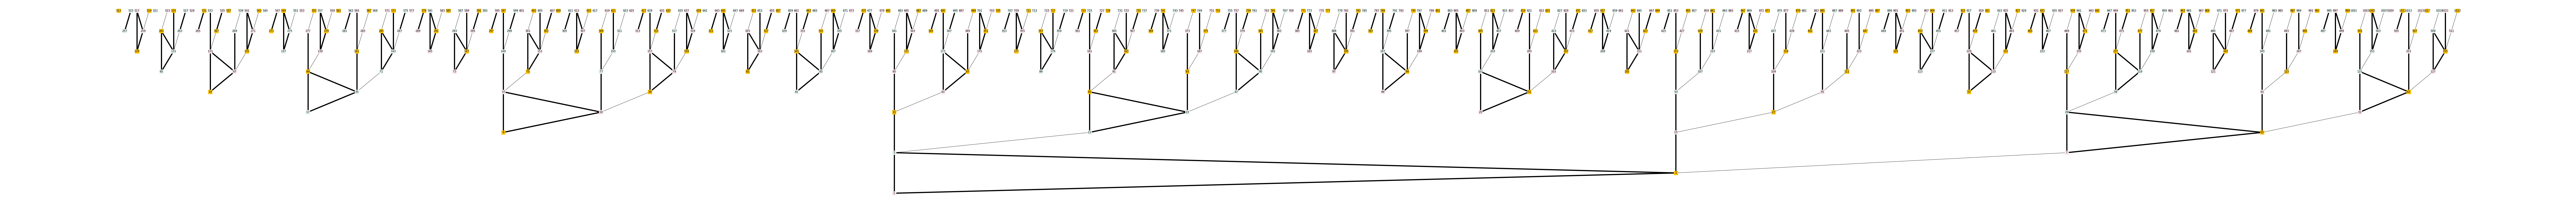

In [5]:
def generatePosArr(label_value):
    
    col_counter = 0
    len_col_i = 0
    len_columns = len(Node.columns)
    col = 0.0
    row = 0.0

    for i in range(0,len_columns):
        len_col_i = len(Node.columns[i])

        for j in range(0, len_col_i):
            
            if Node.columns[i][j] == int(label_value):
                col = float(i+1)
                break

    if label_value == 1:
        row = -2*float(1) * 0.2
    elif label_value == 3:
        row = -1.5*float(2) * 0.2
    
    else:
        for i in range(2,int(label_value)):
            if label_value > (2**(i-1)) and label_value < (2**i):
                row = -1*float(i+1) * 0.2
                break

    result = (col,row)

    return result

aberkane_height = 10 # set number of rows here

AberkaneTree.genColCluster(aberkane_height-1)
root = Node(1)

aberkane_tree = AberkaneTree(root, aberkane_height-1) 

##df = DataFrameGenerator.generateDataFrame(root)
##df = generateDF()

G = nx.Graph()
for i in range(0,len(Node.successor_con)):
  if Node.successor_con[i] == (Node.predecessor_con[i] * 2 -1):
      G.add_edge(Node.predecessor_con[i],Node.successor_con[i],color='white',weight=1)
  elif Node.successor_con[i] == (Node.predecessor_con[i] * 4 + 1):
      G.add_edge(Node.predecessor_con[i],Node.successor_con[i],color='black',weight=5)
  else:
      G.add_edge(Node.predecessor_con[i],Node.successor_con[i],color='black',weight=1)


def addVertex(start):
    big_leaf = 1

    for i in range(1,aberkane_height):
        big_leaf = int(big_leaf * 2 + 1) 
    
    cur_leaf = start
    next_leaf_mid = 1
    next_leaf_right = 1
    counter = 1
    while (counter < aberkane_height ):
    #for i in range(1,big_leaf+1, 2):
        next_leaf_mid = cur_leaf * 4 + 1
        next_leaf_right = cur_leaf * 2 + 1

        if (cur_leaf < big_leaf) and next_leaf_right < big_leaf:
            G.add_edge(cur_leaf,next_leaf_right ,color='black',weight=5)
        
        if (cur_leaf < big_leaf) and next_leaf_mid < big_leaf:
            G.add_edge(next_leaf_right,next_leaf_mid,color='black',weight=5)
            
            if next_leaf_mid * 2+1 < big_leaf:
                addVertex(next_leaf_mid * 2+1)
            
            mid_in_range = next_leaf_mid
            while mid_in_range < big_leaf:
                if mid_in_range * 2+1 < big_leaf:
                    addVertex(mid_in_range * 2+1)
                
                mid_in_range = mid_in_range * 4 + 1


        cur_leaf = (cur_leaf * 2 + 1)*2+1
        counter = counter + 2


###################################################

# i = root.label
# while i < 2**(aberkane_height-1):

#     if i == 1:
#         addVertex(i)
#         i = 9
#     else:
#         addVertex(i)
#         i = i * 2 - 1

for i in Node.movement_con:
    addVertex(i)

####################################################
edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

node_colors = []
for node in G:
    color_type = Node.getType(node)
    node_colors.append(Node.colors[color_type-1])

pos1 = {}
len_col_i = 0
len_columns = len(Node.columns)

for i in range(0,len_columns):
    len_col_i = len(Node.columns[i])
    for j in range(0, len_col_i):
        pos1[Node.columns[i][j]] = generatePosArr(Node.columns[i][j])

print(Node.movement_con)

#for i in range(1,(aberkane_height+1)):
w = 200
h = 16

plt.figure(figsize=(w, h))

plt.gca().invert_yaxis()
#nx.draw(G, pos=pos, with_labels=True,  node_shape="s", node_size=400, linewidths=10)
nx.draw(G, edges = edges, edge_color=colors, width=weights, node_color=node_colors,node_shape = "s", pos=pos1, with_labels=True,  linewidths=1 ) 
